#           TRAINING A ONE LAYER NET ON MNIST

In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import utils

### randint(a,b) returns a random integer between a and b: 

In [29]:
idx=randint(5,10)

print(idx)

10


### Download the TRAINING SET (data+labels)

In [30]:
train_data=torch.load('../../data/mnist/data/train_data.pt')

print(train_data.size())

print (train_data[0])

print (train_data[0].view(1, 784))

torch.Size([60000, 28, 28])
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.

In [31]:
train_label=torch.load('../../data/mnist/data/train_label.pt')

print(train_label.size())

print (train_label[0])

print (train_label[0].view(1))

torch.Size([60000])
tensor(5)
tensor([5])


### Download the TEST SET (data only)

In [32]:
test_data=torch.load('../../data/mnist/data/test_data.pt')

print(test_data.size())

torch.Size([10000, 28, 28])


### Make a one layer net class

In [33]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super(one_layer_net , self).__init__()
        self.linear_layer = nn.Linear( input_size, output_size , bias=False)
        
    def forward(self, x):
        x = self.linear_layer(x)
        p = F.softmax(x, dim=1)
        return p

### Build the net

In [34]:
net=one_layer_net(784,10)
print(net)

one_layer_net(
  (linear_layer): Linear(in_features=784, out_features=10, bias=False)
)


### Take the 6th image of the test set:

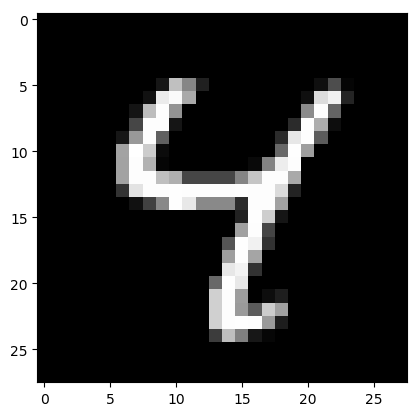

In [35]:
im=test_data[6]
utils.show(im)

### And feed it to the UNTRAINED network:

In [36]:
p =  net( im.view(1, 784) ) 
print(p)

tensor([[0.1072, 0.0813, 0.0996, 0.1189, 0.1047, 0.0886, 0.1143, 0.0835, 0.0916,
         0.1103]], grad_fn=<SoftmaxBackward>)


### Display visually the confidence scores

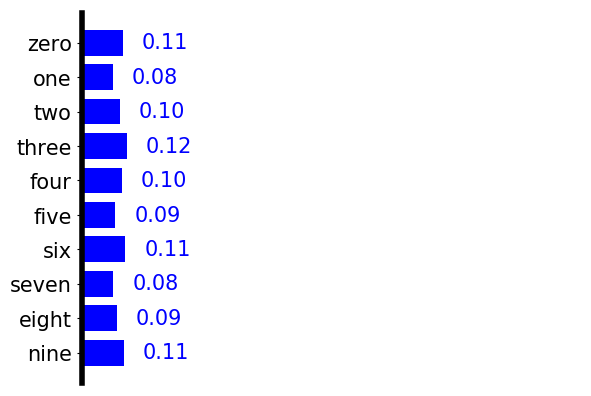

In [37]:
utils.show_prob_mnist(p)

### Train the network (only 5000 iterations) on the train set

In [38]:
criterion = nn.NLLLoss()
optimizer=torch.optim.SGD(net.parameters() , lr=0.01 )

for iter in range(1,5000):
    
    # choose a random integer between 0 and 59,999 
    # extract the corresponding picture and label
    # and reshape them to fit the network
    idx=randint(0, 60000-1)
    input=train_data[idx].view(1,784)
    # print (input)
    label=train_label[idx].view(1)
    # print (label)


    # feed the input to the net  
    input.requires_grad_()
    prob=net(input) 
 
    # update the weights (all the magic happens here -- we will discuss it later)
    log_prob=torch.log(prob)
    loss = criterion(log_prob, label)    
    optimizer.zero_grad()       
    loss.backward()
    optimizer.step()

### Take the 6th image of the test set:

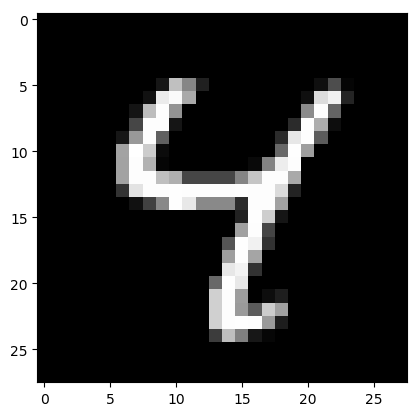

In [39]:
im=test_data[6]
utils.show(im)

### Feed it to the TRAINED net:

In [40]:
prob =  net( im.view(1,784)) 
print(prob)

tensor([[0.0003, 0.0002, 0.0001, 0.0068, 0.8210, 0.0237, 0.0012, 0.0120, 0.0789,
         0.0559]], grad_fn=<SoftmaxBackward>)


### Display visually the confidence scores

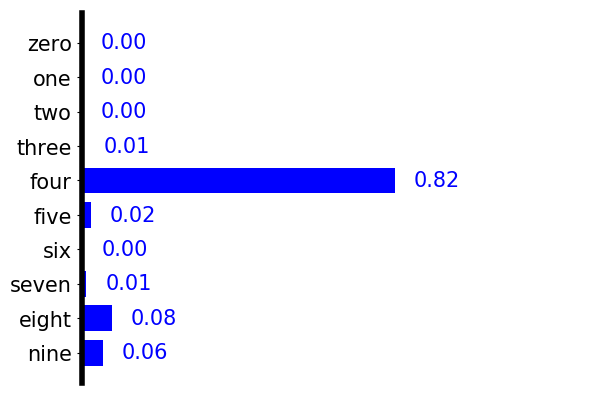

In [41]:
utils.show_prob_mnist(prob)

### Choose image at random from the test set and see how good/bad are the predictions

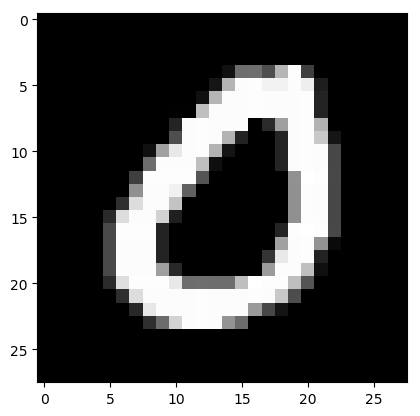

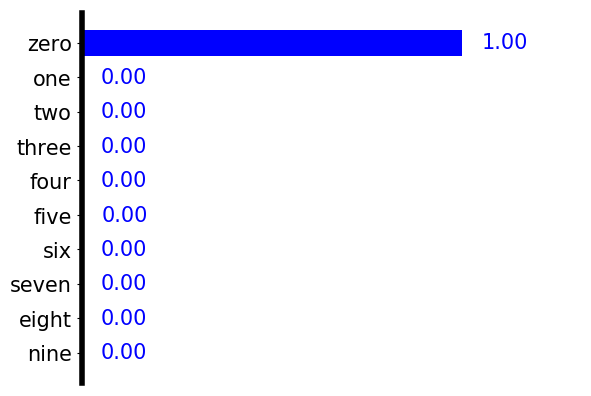

In [42]:
# choose a picture at random
idx=randint(0, 10000-1)
im=test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
prob =  net( im.view(1,784)) 
utils.show_prob_mnist(prob)